<h2>Kelompok: Edogawa Conan</h2>
<p>1118014 - Mikhael Adriel<br>
    1118015 - Ferani Christy<br>
    1118020 - Albertus Kevin<br>
    1118021 - Michelle Natasha Irawan<br>
    1118038 -  Kevin Hartono<br>
    1118049 - Nicholas Anthony<br>
    1118056 - Fransiskus Richard</p>

# Import Library and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [56]:
datacensus = pd.read_csv("datasets/adult.csv")

In [57]:
datacensus.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Cleaning

## Data Duplicate Cleaning

In [58]:
datacensus[datacensus.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [59]:
datacensus = datacensus.drop_duplicates(keep='first',inplace=False)

In [60]:
datacensus.shape

(32537, 15)

## Data Missing Cleaning

In [61]:
datacensus.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [62]:
datacensus.shape

(32537, 15)

In [66]:
datacensus["workclass"].head()

0          ?
1    Private
2          ?
3    Private
4    Private
Name: workclass, dtype: object

In [65]:
datacensus["occupation"].head()

0                    ?
1      Exec-managerial
2                    ?
3    Machine-op-inspct
4       Prof-specialty
Name: occupation, dtype: object

In [69]:
datacensus["native.country"].head(20)

0     United-States
1     United-States
2     United-States
3     United-States
4     United-States
5     United-States
6     United-States
7     United-States
8     United-States
9                 ?
10    United-States
11    United-States
12    United-States
13    United-States
14    United-States
15    United-States
16    United-States
17    United-States
18                ?
19    United-States
Name: native.country, dtype: object

### Filling  "?" Dataframes

In [70]:
datacensus.describe(include="all")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32537.000000,32537,3.253700e+04,32537,32537.000000,32537,32537,32537,32537,32537,32537.000000,32537.000000,32537.000000,32537,32537
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22673,NaN,10494,NaN,14970,4136,13187,27795,21775,NaN,NaN,NaN,29153,24698
mean,38.585549,NaN,1.897808e+05,NaN,10.081815,NaN,NaN,NaN,NaN,NaN,1078.443741,87.368227,40.440329,NaN,NaN
std,13.637984,NaN,1.055565e+05,NaN,2.571633,NaN,NaN,NaN,NaN,NaN,7387.957424,403.101833,12.346889,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.369930e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [71]:
datacensus["workclass"].replace({"?": "Private"}, inplace=True) #replace with modus

In [72]:
datacensus["workclass"].head(3)

0    Private
1    Private
2    Private
Name: workclass, dtype: object

In [73]:
datacensus["occupation"].replace({"?": "Prof-specialty"}, inplace=True) #replace with modus

In [74]:
datacensus["occupation"].head(3)

0     Prof-specialty
1    Exec-managerial
2     Prof-specialty
Name: occupation, dtype: object

In [75]:
#datacensus = datacensus[datacensus["native.country"] != "?"]
datacensus["native.country"].replace({"?": "United-States"}, inplace=True)

In [76]:
datacensus["native.country"].head(3)

0    United-States
1    United-States
2    United-States
Name: native.country, dtype: object

In [77]:
datacensus.shape

(32537, 15)

## Outlier with Boxplot

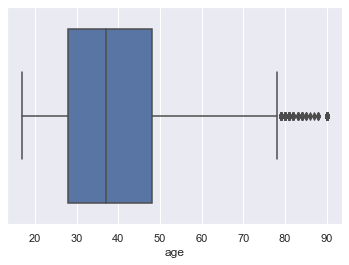

In [18]:
sns.boxplot(x=datacensus["age"])

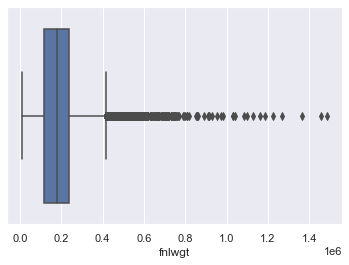

In [19]:
sns.boxplot(x=datacensus["fnlwgt"])

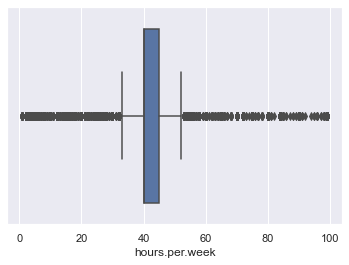

In [20]:
sns.boxplot(x=datacensus["hours.per.week"])

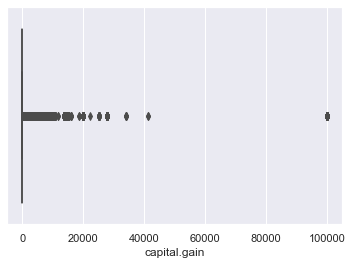

In [21]:
sns.boxplot(x=datacensus["capital.gain"])

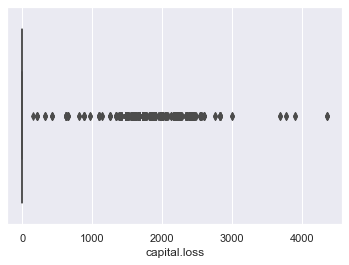

In [22]:
sns.boxplot(x=datacensus["capital.loss"])

### Handling Outlier with Z-Score

In [78]:
from scipy import stats
datacensus = datacensus[(np.abs(stats.zscore(datacensus._get_numeric_data())) < 3).all(axis=1)].copy()

In [79]:
datacensus.shape

(29809, 15)

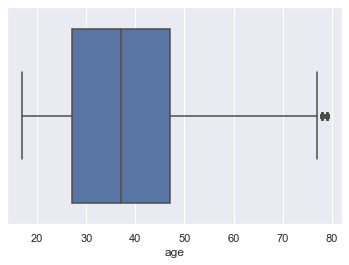

In [80]:
sns.boxplot(x=datacensus["age"])

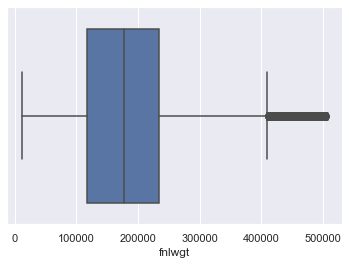

In [81]:
sns.boxplot(x=datacensus["fnlwgt"])

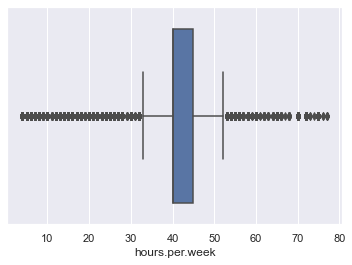

In [82]:
sns.boxplot(x=datacensus["hours.per.week"])

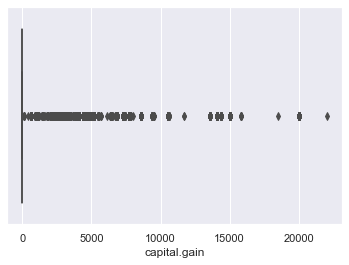

In [83]:
sns.boxplot(x=datacensus["capital.gain"])

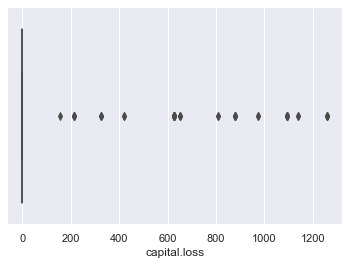

In [84]:
sns.boxplot(x=datacensus["capital.loss"])

# Corelation Analysis Between Numerical Variable

## Plot Heatmap

In [85]:
# Memisahkan data non numeric dengan numeric untuk analisis korelasi antar variable numerik
datacensus_numeric = datacensus.select_dtypes('number').drop(["education.num"], axis=1)
datacensus_numeric

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
1470,62,159908,0,1258,38
1471,72,144515,0,1258,40
1472,76,224680,0,1258,20
1473,66,350498,0,1258,20
1474,33,262042,0,1138,40
...,...,...,...,...,...
32556,22,310152,0,0,40
32557,27,257302,0,0,38
32558,40,154374,0,0,40
32559,58,151910,0,0,40


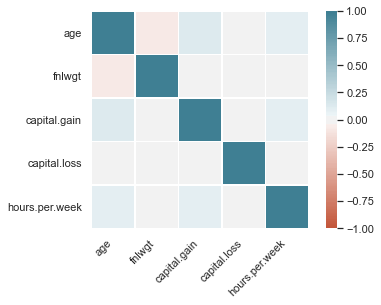

In [86]:
# membuat plot heatmap untuk mengetahui seberapa kuat hubungan antar variable. Semakin biru semakin kuat
corr = datacensus_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    linewidths=.5 ,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Dari hasil heatmap, tidak ada satupun kotak yang memiliki skala nilai 0.50 ke atas (diagonal dikecualikan). Artinya korelasi antar variabel numerik ini lemah. Sebagai contoh, irisan baris "fnlwgt" dengan kolom "age" berwarna merah, yang bila dipetakan dengan skala, memiliki nilai antara 0.00 dan -0.25 sehingga bisa dikatakan korelasi keduanya rendah dan tidak searah. 

## Scatter Plot & Line Plot

#### Age vs fnlwgt

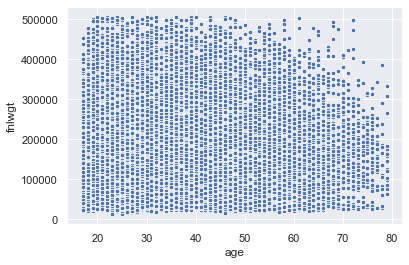

In [32]:
sns.scatterplot(datacensus["age"], datacensus["fnlwgt"], s=20)

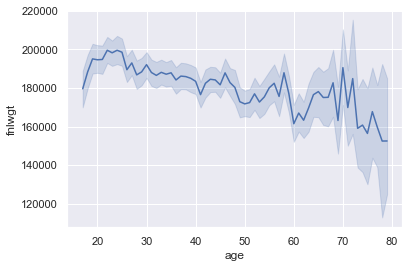

In [33]:
sns.lineplot(x = "age", y="fnlwgt", data=datacensus)

Dari kedua gambar tersebut, tidak bisa dikategorikan apakah jenis relasi "shape" keduanya linear atau kurva, hanya bisa diketahui bahwa non-linear. Karena dari gambar lineplot membentuk garis naik turun tidak beraturan, maka tidak dapat ditentukan apakah jenis relasi "direction" di atas negative atau positif. Dari gambar scatterplot, sulit untuk bisa menentukan apakah relasi "strength" keduanya adalah weak atau strong dan juga konsentrasi data yang mengelompok tidak dapat dilihat sehingga sulit menentukan pemisah yang jelas untuk menentukan data outlier.

#### Age vs Hours per Week

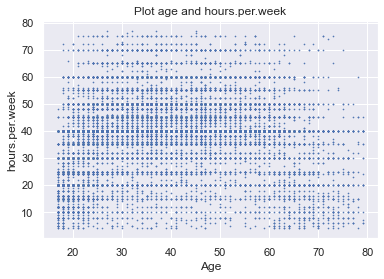

In [34]:
plt.scatter(datacensus["age"], datacensus["hours.per.week"],s=0.4)
plt.xlabel("Age")
plt.ylabel("hours.per.week")
plt.title("Plot age and hours.per.week")
plt.show()

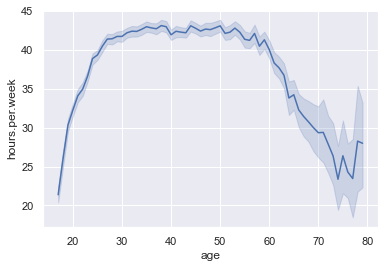

In [35]:
sns.lineplot(x="age",y="hours.per.week", data=datacensus)

Kurva ini memiliki kecenderungan shape curved, dengan tingkat strength yang kuat. Kurva ini memiliki 2 arah, bisa terlihat bawah dari age 20 sampai sekitar age 40, arahnya merupakan arah positive, yang artinya semakin bertambahnya umur, maka semakin bertambahnya hours.per.week. kemudian mulai dari age 60 hingga 80 kurva cenderung mengalami penurunan, yg berarti directionny adalah negatif, ketiga age semakin bertambah pada rentang 60-80, hours per week cenderung menurun

#### Age vs Capital Gain

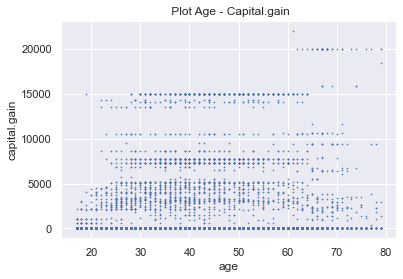

In [36]:
plt.scatter(datacensus["age"], datacensus["capital.gain"],s=0.4)
plt.xlabel("age")
plt.ylabel("capital.gain")
plt.title(" Plot Age - Capital.gain")
plt.show()

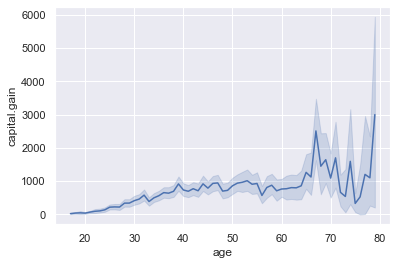

In [37]:
sns.lineplot(x="age",y="capital.gain",data=datacensus)

garis berbentuk kurva dan cenderung positif,  yg berarti semakin bertambahnya usia, capital gain akan semakin naik untuk rentang usia 20 - 70. Setelah itu kurva cenderung ke arah negatif, semakin bertambahnya umur rentang 70-80, capital gain cenderung berkurang. Tingkat strength nya adalah strong

#### Age vs Capital Loss

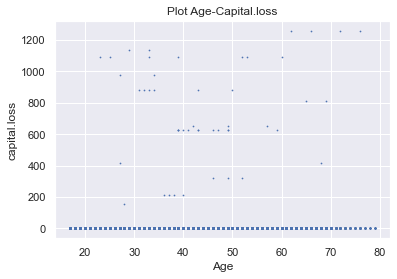

In [38]:
plt.scatter(datacensus["age"], datacensus["capital.loss"], s=0.5)
plt.xlabel("Age")
plt.ylabel("capital.loss")
plt.title("Plot Age-Capital.loss")
plt.show()

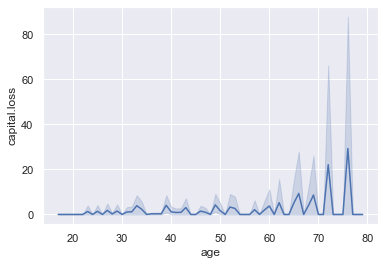

In [39]:
sns.lineplot(x="age",y="capital.loss",data=datacensus)

Pada analisis jenis relasi antara age dengan capital loss, sulit untuk bisa menentukan jenis relasi "direction" adalah positif atau negatif, dikarenakan pada gambar lineplot, garis naik turun tidak beraturan, tidak ada kecendurungan naik atau turun. Jenis relasi shape adalah nonlinear, meskipun bukan curved. Untuk analisis "strength", sulit untuk bisa ditentukan. Begitu pun dengan outlier. Hal ini dipengaruhi oleh value dataset dari kolom capital loss, yang memiliki banyak nilai 0, yang membuat ragu apakah 0 ini sebagai data sesungguhnya, atau sebagai missing value. Jika merupakan data yang sesungguhnya, bisa dikatakan jenis relasi "strength" adalah strong, karena scatter plot dibandingkan dengan garis dari age 20 hingga 60 cendderung berdekatan dan outlier dapat diindikasikan oleh data dengan value capital loss diatas 200

#### fnlwgt vs hours per week

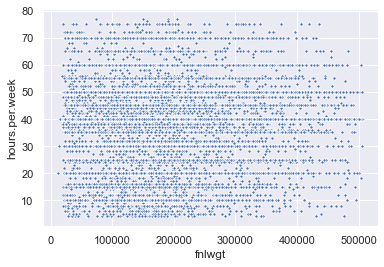

In [40]:
sns.scatterplot(datacensus["fnlwgt"], datacensus["hours.per.week"], s=10)

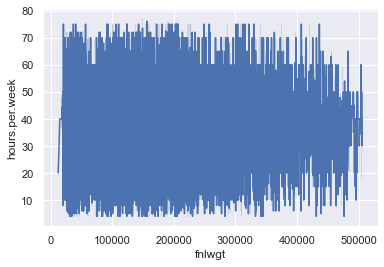

In [41]:
sns.lineplot(x="fnlwgt",y="hours.per.week",data=datacensus)

Analisis jenis relasi antara fnlwgt dengan hours per week, untuk jenis direction tidak dapat ditentukan, karena garis benar-benar tidak beraturan. Relasi "strength" tidak dapat ditentukan, karena dari gambar tersebut tidak memiliki garis pasti yang menunjukkan hubungan kedua variable tersebut. Untuk outlier sulit ditentukan, karena tidak ada rentang khusus tertentu tempat data-data cenderung terkonsentrasi.

#### fnlwgt vs capital gain

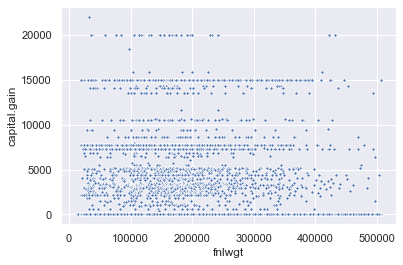

In [42]:
sns.scatterplot(datacensus["fnlwgt"], datacensus["capital.gain"], s=10)

In [42]:
sns.lineplot(x="fnlwgt",y="capital.gain",data=datacensus)

Analisis jenis relasi antara fnlwgt dengan capital gain, untuk jenis direction tidak dapat ditentukan, karena garis benar-benar tidak beraturan. Relasi "shape" adalah nonlinear namun bukan curved juga. Relasi "strength" tidak dapat ditentukan, karena dari gambar tersebut tidak memiliki garis pasti yang menunjukkan hubungan kedua variable tersebut. Untuk outlier sulit ditentukan, karena tidak ada rentang khusus tertentu tempat data-data cenderung terkonsentrasi.

#### fnlwgt vs capital loss

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt', ylabel='capital.loss'>

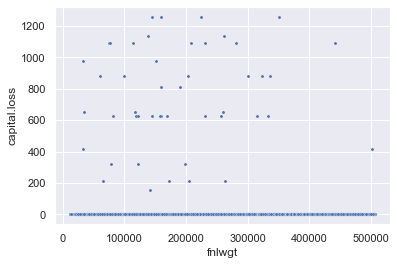

In [43]:
sns.scatterplot(datacensus["fnlwgt"], datacensus["capital.loss"], s=10)

In [44]:
sns.lineplot(x="fnlwgt",y="capital.loss",data=datacensus)

Analisis jenis relasi antara fnlwgt dengan capital loss, untuk jenis direction tidak dapat ditentukan, karena garis tidak beraturan, cenderung naik dan turun secara ekstrim. Relasi "shape" adalah nonlinear namun bukan curved juga. Relasi "strength" tidak dapat ditentukan, karena dari gambar tersebut tidak memiliki garis pasti yang menunjukkan hubungan kedua variable tersebut. Untuk outlier sulit ditentukan, karena tidak ada rentang khusus tertentu tempat data-data cenderung terkonsentrasi.

#### Hours per Week vs capital gain

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours.per.week', ylabel='capital.gain'>

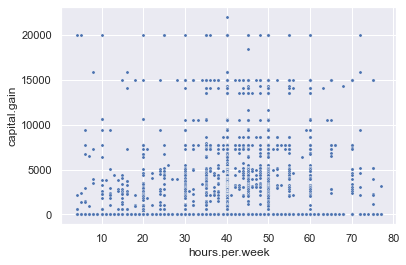

In [45]:
sns.scatterplot(datacensus["hours.per.week"], datacensus["capital.gain"], s=10)

<AxesSubplot:xlabel='hours.per.week', ylabel='capital.gain'>

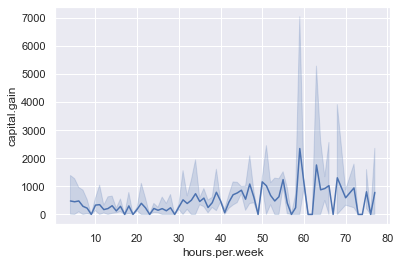

In [46]:
sns.lineplot(x="hours.per.week",y="capital.gain",data=datacensus)

Analisis jenis relasi antara capital gain dengan hours per week, untuk jenis direction tidak dapat ditentukan, karena garis tidak beraturan, cenderung naik dan turun tanpa pola tertentu. Relasi "shape" adalah nonlinear namun bukan curved juga. Relasi "strength" tidak dapat ditentukan, karena dari gambar tersebut tidak memiliki garis pasti yang menunjukkan hubungan kedua variable tersebut. Untuk outlier sulit ditentukan, karena tidak ada rentang khusus tertentu tempat data-data cenderung terkonsentrasi.

#### Hours per week vs Capital Loss

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours.per.week', ylabel='capital.loss'>

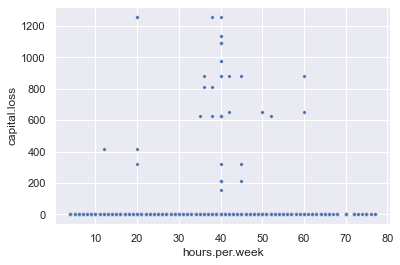

In [47]:
sns.scatterplot(datacensus["hours.per.week"], datacensus["capital.loss"], s=12)

<AxesSubplot:xlabel='hours.per.week', ylabel='capital.loss'>

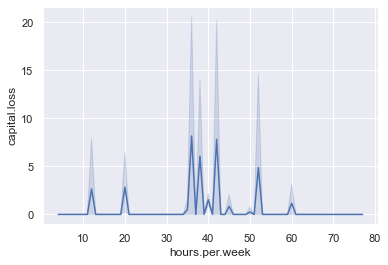

In [48]:
sns.lineplot(x="hours.per.week",y="capital.loss",data=datacensus)

Analisis relasi antara hours per week dengan capital loss. Untuk jenis relasi direction, tidak bisa ditentukan, karena tidak ada kecendurangan naik atau turun. Untuk shape merupakan non linear dan tingkat strength sulit ditentukan, karena jika ditarik garis, dapat membentuk hubungan strong dengan capital loss berada di nilai 0. Untuk outlier, jika mengikuti nilai capital loss di 0, maka dapat dikatakan terdapat outlier. Namun, data capital loss ini masih harus dicari tahu lebih mendalam untuk dapat menentukan analisis relasi.

#### Capital Gain vs Capital Loss

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital.gain', ylabel='capital.loss'>

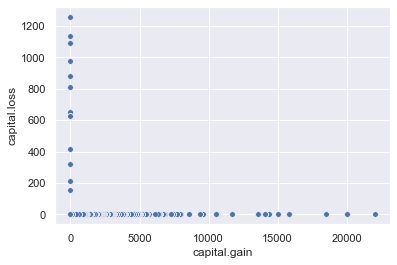

In [49]:
sns.scatterplot(datacensus["capital.gain"], datacensus["capital.loss"], s = 30)

<AxesSubplot:xlabel='capital.gain', ylabel='capital.loss'>

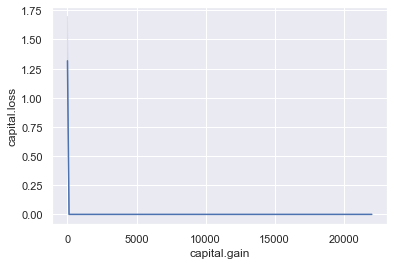

In [50]:
sns.lineplot(x="capital.gain",y="capital.loss",data=datacensus)

Terbentuk garis unik antara capital loss dan capital gain. Analisis jenis relasi "direction" tidak dapat ditentukan. Analisis shape juga tidak dapat ditentukan, meskipun terlihat linear, namun terdapat hubungan yang tidak dapat dijelaskan dari garis tegak lurus yang terbentuk. Untuk strength dan outlier pun tidak dapat ditentukan jenis relasi yang sesuai.

### Count spearman / pearson between numerical feature

In [51]:
from scipy.stats import spearmanr, pearsonr

In [52]:
for i in  range (len(datacensus_numeric.columns)-1) :
    for j in range(i+1, len(datacensus_numeric.columns)):
        ## count pearson and spearman
        corr_spearman, _ = spearmanr(datacensus[datacensus_numeric.columns[i]], datacensus[datacensus_numeric.columns[j]])
#         corr_pearson, _ = pearsonr(datacensus[datacensus_numeric.columns[i]], datacensus[datacensus_numeric.columns[j]])
        print("corelation between features ", datacensus_numeric.columns[i], " with ", datacensus_numeric.columns[j])
#         print("pearson : ", corr_pearson)
        print("spearman : ", corr_spearman)
        print("--------------------------------")

corelation between features  age  with  fnlwgt
spearman :  -0.07488294572748076
--------------------------------
corelation between features  age  with  capital.gain
spearman :  0.12499401088768344
--------------------------------
corelation between features  age  with  capital.loss
spearman :  0.018956625167265095
--------------------------------
corelation between features  age  with  hours.per.week
spearman :  0.15427673035045064
--------------------------------
corelation between features  fnlwgt  with  capital.gain
spearman :  -0.0055349716276945635
--------------------------------
corelation between features  fnlwgt  with  capital.loss
spearman :  -0.0011275069855092316
--------------------------------
corelation between features  fnlwgt  with  hours.per.week
spearman :  -0.02173686136631959
--------------------------------
corelation between features  capital.gain  with  capital.loss
spearman :  -0.011907389146956387
--------------------------------
corelation between features  

Dari hasil analisis korelasi spearman (digunakan karena keseluruhan data tidak membentuk relasi linear), nilai negatif menunjukkan hubungan antar kedua variable tidaklah searah. Untuk nilai koeefisien antara 0.00 hingga 0.25, hubungan kedua variable lemah. Dilihat dari hasil diatas, dapat disimpulkan bahwa semua antar variable numerik adalah lemah, dikarenakan tidak ada nilai koefisien yang mencapai 0.25

# Distribution Analysis

### Age

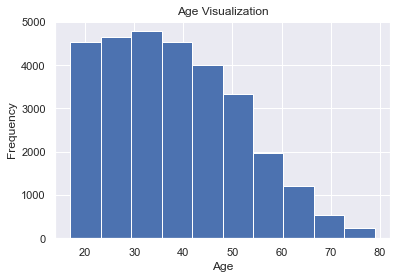

In [53]:
plt.hist(datacensus["age"])
plt.title("Age Visualization")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Menurut visualisasi data diatas skewness nya adalah right skew dan not symetric. Usia maksimal berada direntang usia 30 dengan frekuensi lebih dari 4000.

### work class 

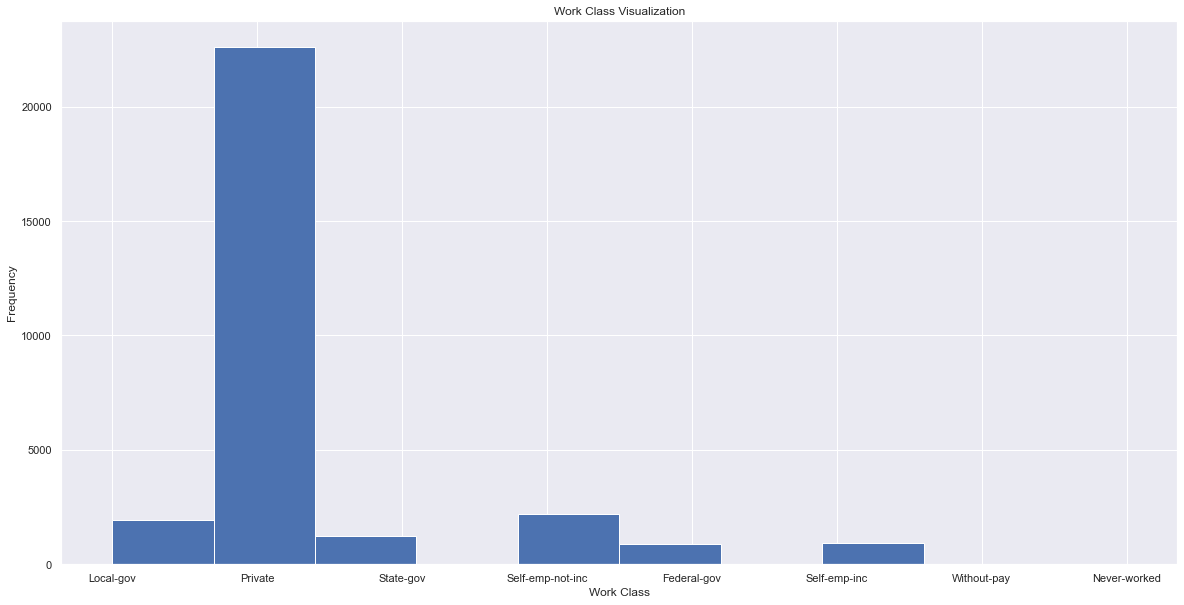

In [54]:
plt.figure(figsize=[20,10])
plt.hist(datacensus["workclass"])
plt.title("Work Class Visualization")
plt.xlabel("Work Class")
plt.ylabel("Frequency")
plt.show()

Menurut visualisasi data diatas frekuensi tertinggi pada working class private/pribadi dengan nilai frekuensi 20000. Modalitynya adalah unimodal.

### fnlwgt

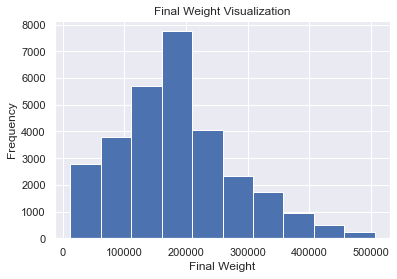

In [55]:
plt.hist(datacensus["fnlwgt"])
plt.title("Final Weight Visualization")
plt.xlabel("Final Weight")
plt.ylabel("Frequency")
plt.show()

Menurut visualisasi data diatas modalitynya adalah unimodal dan skewness right skew. Dengan nilai frekuensi final weight tertinggi berada di rentang 20000.

### Education

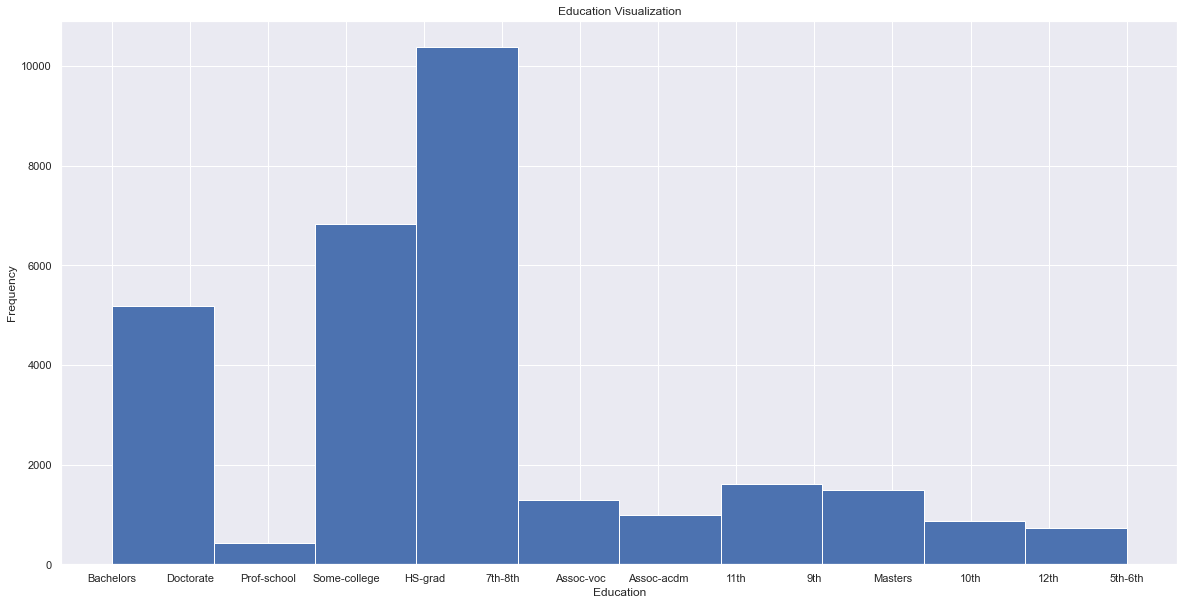

In [56]:
plt.figure(figsize=(20,10))
plt.hist(datacensus["education"])
plt.title("Education Visualization")
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.show()

Menurut visualisasi data diatas modalitynya adalah unimodal dan skewness right skew. Dengan nilai frekuensi edukasi tertinggi berada di HS-grad (lulusan SMA). 

### Marital Status

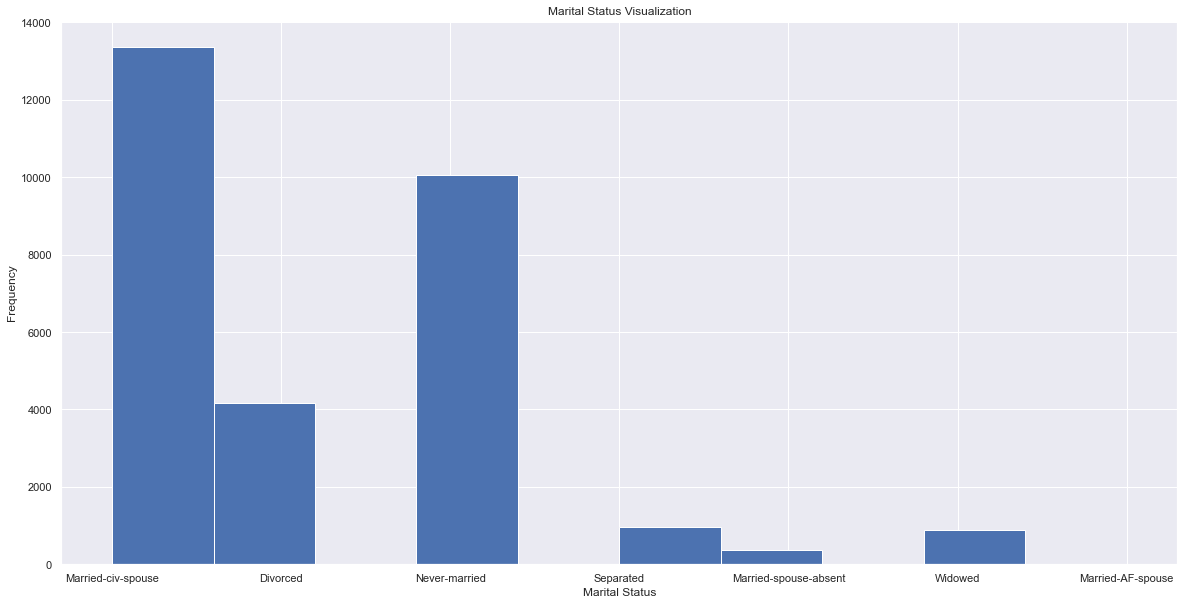

In [57]:
plt.figure(figsize=[20,10])
plt.hist(datacensus["marital.status"])
plt.title("Marital Status Visualization")
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.show()

Menurut visualisasi data diatas frekuensi tertinggi ada pada married-civ-spouse dengan frekuensi diatas 12000 dengan modalitynya adalah unimodal.

### Occupation

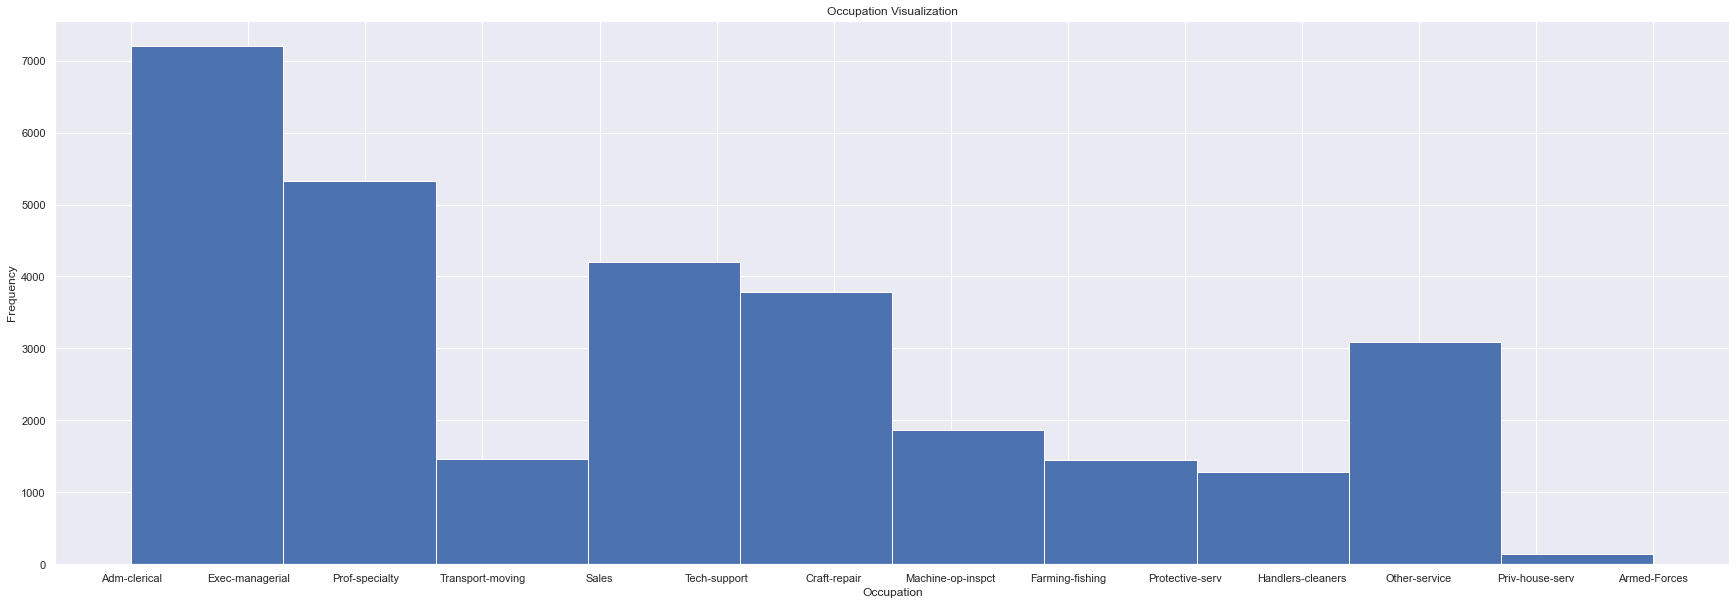

In [58]:
plt.figure(figsize=[30,10])
plt.hist(datacensus["occupation"])
plt.title("Occupation Visualization")
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.show()

Menurut visualisasi diatas modalitynya adalah multimodal dan frekuensi terbanyak ada pada Adm-clerical dengan frekuensi diatas 7000

### Relationship

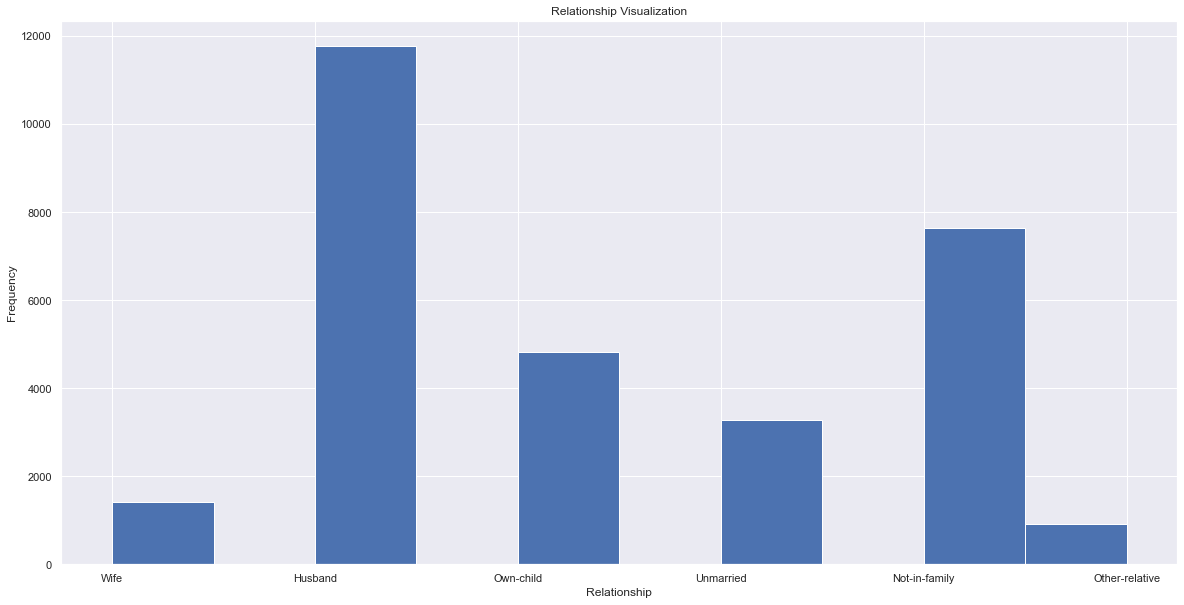

In [59]:
plt.figure(figsize=[20,10])
plt.hist(datacensus["relationship"])
plt.title("Relationship Visualization")
plt.xlabel("Relationship")
plt.ylabel("Frequency")
plt.show()

Menurut data visualisasi diatas, frekuensi tertinggi ada pada Husband dengan frekuensi berada diatas 10000 dengan modality bimodal

### Race

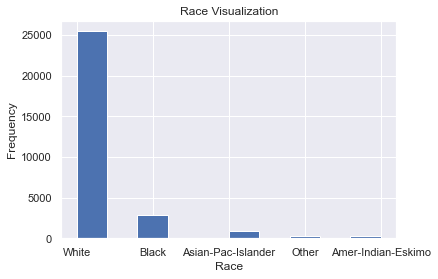

In [60]:
plt.hist(datacensus["race"])
plt.title("Race Visualization")
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.show()

Menurut data visualisasi diatas, modality adalah unimodal dan skewness nya adalah right skewed yang frekuensi tertingginya berada pada White dengan frekuensi diatas 20000

### Sex

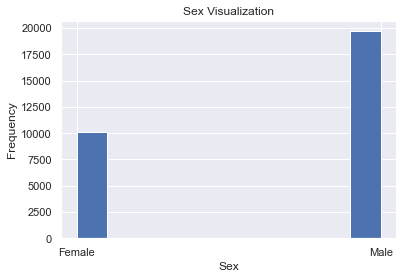

In [61]:
plt.hist(datacensus["sex"])
plt.title("Sex Visualization")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

Menurut data visalisasi diatas frekuensi tertinggi ada pada Male dengan frekuensi diatas 17500

### Capital Loss

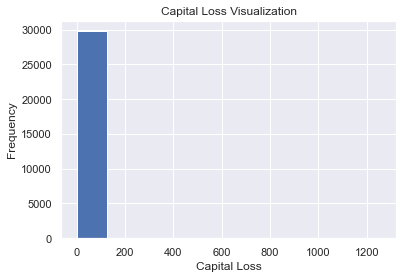

In [62]:
plt.hist(datacensus["capital.loss"])
plt.title("Capital Loss Visualization")
plt.xlabel("Capital Loss")
plt.ylabel("Frequency")
plt.show()

Menurut data visualisasi diatas, frekuensi tertinggi berada pada rentang sekitar 0-100 dengan frekuensi diatas 250000

### Capital Gain

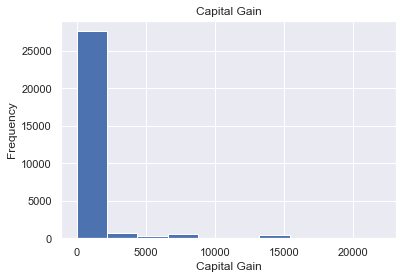

In [63]:
plt.hist(datacensus["capital.gain"])
plt.title("Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")
plt.show()

Menurut data visualisasi diatas, modalitynya adalah unimodal dan skewnessnya adalah right skewed dengan frekuensi tertinggi ada pada rentang sekitar 0-2500 dengan frekuensi diatas 25000

### Hours per Week

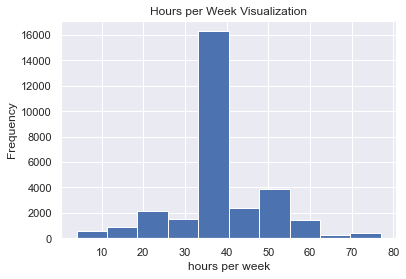

In [64]:
plt.hist(datacensus["hours.per.week"])
plt.title("Hours per Week Visualization")
plt.xlabel("hours per week")
plt.ylabel("Frequency")
plt.show()

Dari data visualisasi diatas frekuensi tertingi pada rentang sekitar 35-40 dengan frekuensi diatas 14000 dengan modality unimodal dan skewness nya symetric

### Native Country

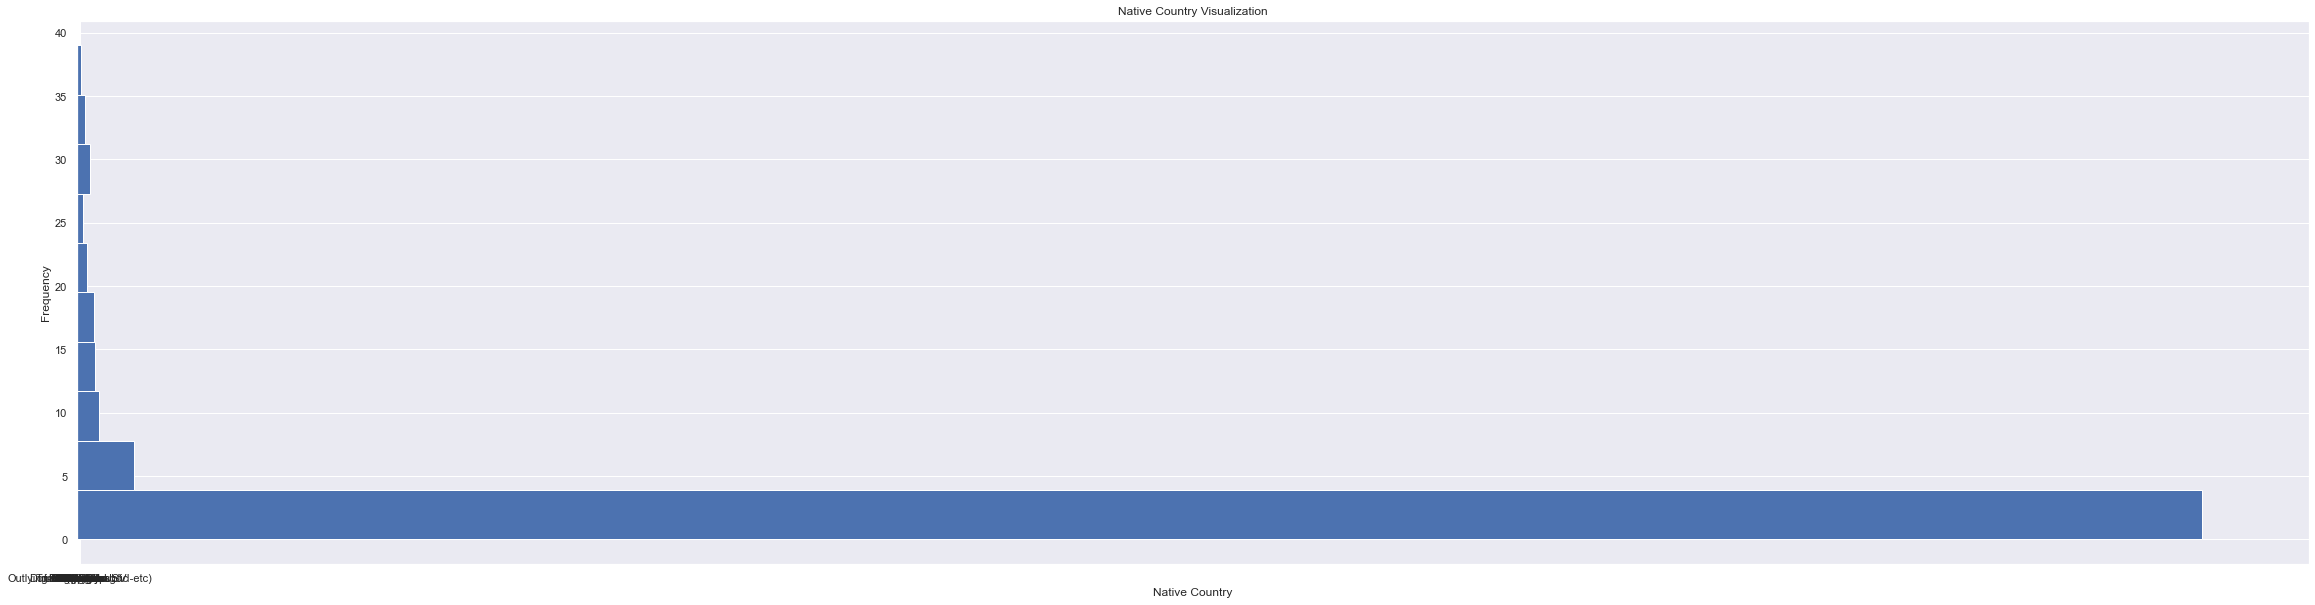

In [65]:
plt.figure(figsize=[40,10])
plt.hist(datacensus["native.country"], orientation='horizontal')
plt.title("Native Country Visualization")
plt.ylabel("Frequency")
plt.xlabel("Native Country")
plt.show()

Dari data visualisasi diatas, modality nya adalah bimodal dan skewness nya adalah left skewed dengan frekuensi tertinggi dimana frekuensi tertinggi berada pada native country yang united states dengan frekuensi berada diatas 25000

### Income

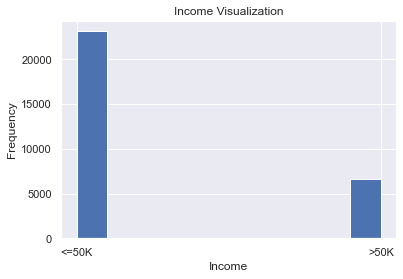

In [66]:
plt.hist(datacensus["income"])
plt.title("Income Visualization")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

Dari data visualisasi diatas dapat dilihat bahwa frekuensi terbanyak pada income dibawah 50k dengan frekuensi diatas 20000

# Statistic Descriptive

In [67]:
datacensus.describe(include="all")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,29809.000000,29809,29809.000000,29809,29809.000000,29809,29809,29809,29809,29809,29809.000000,29809.000000,29809.000000,29809,29809
unique,NaN,8,NaN,14,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22621,NaN,9800,NaN,13376,5326,11755,25456,19702,NaN,NaN,NaN,27337,23157
mean,38.147573,NaN,185200.536348,NaN,10.078366,NaN,NaN,NaN,NaN,NaN,570.580664,1.210138,39.898990,NaN,NaN
std,13.357835,NaN,94559.611648,NaN,2.452767,NaN,NaN,NaN,NaN,NaN,2333.235031,32.721964,11.137214,NaN,NaN
min,17.000000,NaN,12285.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,4.000000,NaN,NaN
25%,27.000000,NaN,117509.000000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,177669.000000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,234271.000000,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Dari hasil statistik deskriptif tabel diatas pada kolom age dapat diketahui bahwa rata rata umur berada di umur 38. Dengan sampel termuda adalah 17 dan sampel tertua adalah 77, Dapat diketahui juga bahwa data fitur age adalah right skewness karena mean lebih besar dari median. Berdasarkan Q1,Q2, dan Q3 serta nilai rata rata dapat disimpulkan bahwa sebagian besar umurnya berada dalam umur produktif meskipun ada yang diluar umur tidak produktif. Dengan standar deviasi 12 pada kolom age.

Kolom workclass, dapat diketahui bahwa nilai terbanyak yang muncul adalah private dengan frekuensi 20575. Banyaknya value dari workclass adalah 7 kelas.

Kolom final weight, dapat diketahui jumlah terkecil karakteristik sampel yang sama sebanyak 13769 dan jumlah terbesar karakteristik sampel yang sama sebanyak 506436.

Kolom education, diatas dapat diketahui bahwa modus berada pada HS-grad dan frekuensi 9178. Berdasarkan hasil nilai unique terdapat 14 kategori education.

## White Race HS-Grad Education

In [68]:
df_raceW = datacensus.query('race == "White"').copy()
df_raceEduW = df_raceW.query('education == "HS-grad"').copy()
df_raceAbove50kW = df_raceEduW.query('income == ">50K"').copy()
len(df_raceAbove50kW.index) #count all rows
#16%

1348

In [69]:
df_raceBelow50kW = df_raceEduW.query('income == "<=50K"').copy()
len(df_raceBelow50kW.index) #count all rows
#84%

6960

<AxesSubplot:xlabel='income', ylabel='count'>

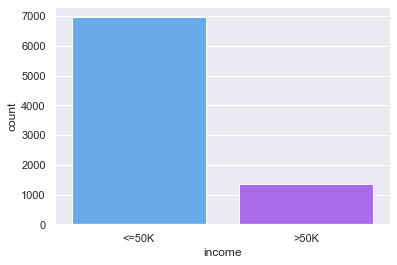

In [70]:
sns.countplot(data=df_raceEduW, x='income', palette='cool')

In [71]:
df_raceB = datacensus.query('race == "Black"').copy()
df_raceEduB = df_raceB.query('education == "HS-grad"').copy()
df_raceAbove50kB = df_raceEduB.query('income == ">50K"').copy()
len(df_raceAbove50kB.index) #count all rows
#6%

68

In [72]:
df_raceBelow50kB = df_raceEduB.query('income == "<=50K"').copy()
len(df_raceBelow50kB.index) #count all rows
#94%

1022

<AxesSubplot:xlabel='income', ylabel='count'>

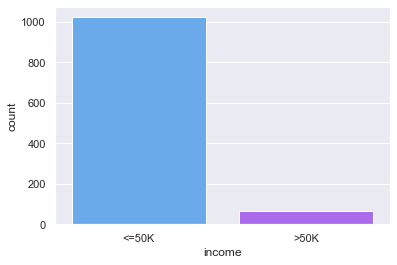

In [73]:
sns.countplot(data=df_raceEduB, x='income', palette='cool')

Karena modus kategorikal pada variabel [education] adalah HS-grad (High School Graduation), percobaan statistik deskriptif dilakukan pada [race] yang kedua terbesar, yaitu ras 'White' dan ras 'Black', dengan edukasi HS-grad. Lalu income untuk setiap ras dibandingkan untuk yang ><span>&#36;</span>50k dan <=<span>&#36;</span>50k. Jika kita membandingkan income diantara ras kedua ini, perbedaannya hanya 10% pada ras hitam. Walaupun ras putih pada data ini sangat mendominan, perbedaan antar ras hitam tidak terlalu besar. Pada tahun 2017, bisa dikatakan, bahwa kesempatan ras putih di Amerika Serikat untuk mendapatkan pendapatan lebih dari <span>&#36;</span>50k setelah lulus SMA lebih besar dibanding ras hitam. Kesempatan ini bisa dalam bentuk peluang pekerjaan yang terbuka dengan gelar SMA, bisnis, ataupun melanjutkan perusahaan orang tua, banyak hal yang bisa di evaluasi pada 'kesempatan' yang diraih.

## Income comparison to Married vs. Not Marriage

In [77]:
datacensus['marital.status'].value_counts()

Married-civ-spouse       13376
Never-married            10047
Divorced                  4157
Separated                  957
Widowed                    880
Married-spouse-absent      373
Married-AF-spouse           19
Name: marital.status, dtype: int64

In [105]:
labels = ["Married-civ-spouse", "Never-married", "Divorced", "Separated", "Widowed", "Married-spouse-absent", "Married-AF-spouse"]
explode = [0, 0, 0, 0, 0, 0, 0]
jumlah = [13376, 10047, 4157, 957, 880, 373, 19]

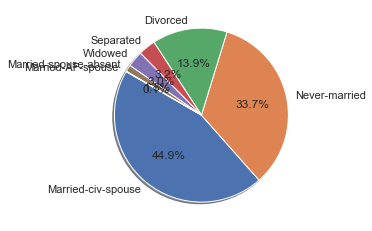

In [106]:
plt.pie(jumlah, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=150)
plt.show()

Jika kita perhatikan pie chart mengenai marital status, kita bisa asumsi bahwa seseorang yang dikategorikan "divorced" sudah tidak menikah. Tidak bisa dikategorikan sebagai "married" ataupun "never-married".

In [76]:
df_above50k = datacensus.query('income == ">50K"').copy()
df_below50k = datacensus.query('income == "<=50K"').copy()

In [78]:
df_above50k['marital.status'].value_counts()

Married-civ-spouse       5698
Never-married             408
Divorced                  390
Widowed                    68
Separated                  52
Married-spouse-absent      26
Married-AF-spouse          10
Name: marital.status, dtype: int64

In [79]:
df_below50k['marital.status'].value_counts()

Never-married            9639
Married-civ-spouse       7678
Divorced                 3767
Separated                 905
Widowed                   812
Married-spouse-absent     347
Married-AF-spouse           9
Name: marital.status, dtype: int64

Perbandingan statistika dilakukan berdasarkan modus kedua besar pada variabel [marital.status] yaitu "Married Civilian Spouse" (kita gunakan abreviasi 'married' untuk kategori ini) dan "Never Married". Jika dibandingkan dengan total data yang sudah married, hasil adalah <b>43%</b> untuk keluarga yang mempunyai pendapatan ><span>&#36;</span>50k dan kebalikannya yang mempunyai pendapatan <=<span>&#36;</span>50k </span> berjumlah <b>57%</b> dari total. Sedangkan jika kita bandingkan dengan "Never Married". Hasil berdasarkan data, untuk seseorang yang tidak menikah dengan pendapatan ><span>&#36;</span>50 hanya sebesar <b>4%</b> sementara untuk yang tidak menikah dengan pendapatan <=<span>&#36;</span>50 hanya sebesar <b>96%</b>. 
<br><br>
Selisih untuk seseorang yang dikategorikan married hanya berjumlah <b>14%</b>.  <br>
Sedangkan bagi yang tidak menikah berjumlah <b>92%</b>.
<br><br>
Berdasarkan analisa ini, bisa dikatakan bahwa status pernikahan ada efek pada penghasilan seseorang. Mungkin dengan pasangan hidup, mereka mempunyai goal hidup yang lebih tergambar. Walaupun perbedaan hanya <b>14%</b> tidak semua keluarga harus menghasilkan ><span>&#36;</span>50k / tahun. Tetapi bisa disimpulkan bahwa status pernikahan seseorang dapat mempengaruhi faktor kehidupan untuk e.g: bekerja keras, menggambar tujuan, etc., dimana hal ini dapat mempengaruhi caranya untuk mendapat pendapatan ><span>&#36;</span>50k / tahun.

## Occupation (Job Positions) vs. Income

In [80]:
occBelow50k = datacensus.query('income == "<=50K"').copy()

In [81]:
occAbove50k = datacensus.query('income == ">50K"').copy()

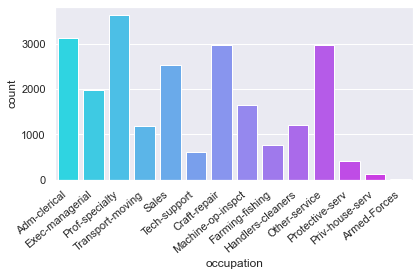

In [82]:
ax = sns.countplot(data=occBelow50k, x='occupation', palette='cool')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [83]:
occBelow50k["occupation"].value_counts()

Prof-specialty       3634
Adm-clerical         3120
Craft-repair         2973
Other-service        2963
Sales                2527
Exec-managerial      1970
Machine-op-inspct    1648
Handlers-cleaners    1213
Transport-moving     1187
Farming-fishing       765
Tech-support          613
Protective-serv       408
Priv-house-serv       128
Armed-Forces            8
Name: occupation, dtype: int64

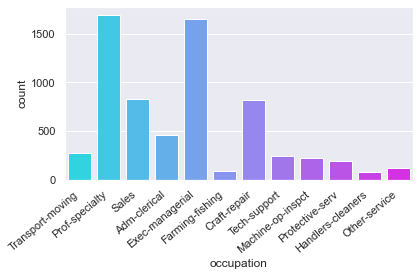

In [84]:
ax = sns.countplot(data=occAbove50k, x='occupation', palette='cool')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [85]:
occAbove50k["occupation"].value_counts()

Prof-specialty       1692
Exec-managerial      1648
Sales                 826
Craft-repair          815
Adm-clerical          459
Transport-moving      275
Tech-support          242
Machine-op-inspct     223
Protective-serv       190
Other-service         120
Farming-fishing        89
Handlers-cleaners      73
Name: occupation, dtype: int64

Pada dua grafik count pada occupation / job entries yang terdaftar pada dataset tahun 2017. Top 3 pekerjaan yang diambil dengan penghasilan ><span>&#36;</span>50k adalah <b>Professional Specialty</b> (biasanya bidang yang tertentu), <b>Executive Managerial</b>, dan <b>Sales</b>. Namun untuk pekerjaan yang <=<span>&#36;</span>50, top 3 pekerjaan adalah <b>Professional Specialty</b>, <b>Administrative Clerk</b>, <b>Craft Repair</b>. Tentunya untuk "other services" bisa dalam bentuk pekerjaan yang banyak. Kembali lagi pada perspektif seseorang, mungkin untuk pekerjaan top 3 yang <=<span>&#36;</span>50k tidak berarti penghasilan pekerjaan tersebut memang rendah. Tetapi, sebuah pekerjaan mempunyai karakteristiknya sendiri yang relevan pada dunia nyata, dimana faktor trend juga ada pengaruhnya. Jadi sebagai kesimpulan, berdasarkan dataset 2017, pekerjaan yang disebut sebagai trend penghasilan ><span>&#36;</span>50k adalah <b>Professional Specialty</b>. Dimana pekerjaan ini bisa melibatkan hobby seseorang sehingga mencapai level profesi yang tinggi.

## Female vs. Male Income

### Female

In [86]:
df_sexFemale = datacensus.query('sex == "Female"').copy()
df_sexAbove50kFemale = df_sexFemale.query('income == ">50K"').copy()
len(df_sexAbove50kFemale.index) #count all rows

1022

In [87]:
df_sexBelow50kFemale = df_sexFemale.query('income == "<=50K"').copy()
len(df_sexBelow50kFemale.index) #count all rows

9085

<AxesSubplot:xlabel='income', ylabel='count'>

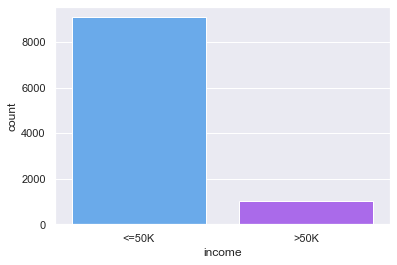

In [88]:
sns.countplot(data=df_sexFemale, x='income', palette='cool')

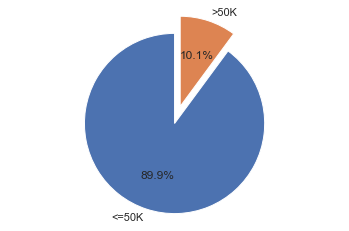

In [89]:
y = [len(df_sexBelow50kFemale.index), len(df_sexAbove50kFemale.index)]
mylabels = ["<=50K", ">50K"]
myexplode = [0.2, 0]

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=myexplode, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

### Male

In [90]:
df_sexMale = datacensus.query('sex == "Male"').copy()
df_sexAbove50kMale = df_sexMale.query('income == ">50K"').copy()
len(df_sexAbove50kMale.index) #count all rows

5630

In [91]:
df_sexBelow50kMale = df_sexMale.query('income == "<=50K"').copy()
len(df_sexBelow50kMale.index) #count all rows

14072

<AxesSubplot:xlabel='income', ylabel='count'>

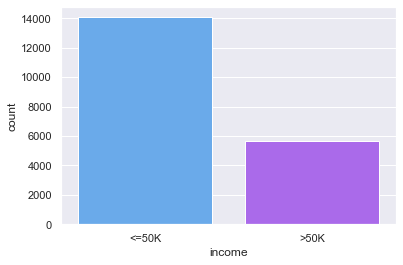

In [92]:
sns.countplot(data=df_sexMale, x='income', palette='cool')

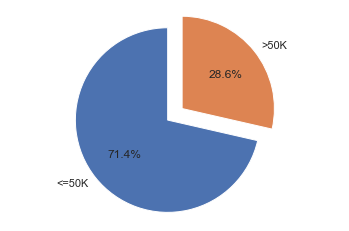

In [93]:
y = [len(df_sexBelow50kMale.index), len(df_sexAbove50kMale.index)]
mylabels = ["<=50K", ">50K"]
myexplode = [0.2, 0]

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=myexplode, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

### Female vs. Male

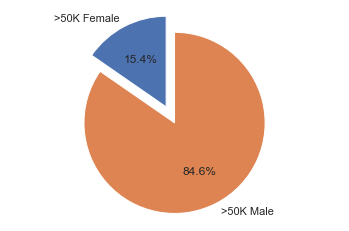

In [94]:
y = [len(df_sexAbove50kFemale.index), len(df_sexAbove50kMale.index)]
mylabels = [">50K Female", ">50K Male"]
myexplode = [0.2, 0]

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=myexplode, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

Berdasarkan analisis ini income ><span>&#36;</span>50k yang dihasilkan oleh gender pria lebih besar dibandingkan wanita, dimana persentase wanita yang menghasilkan ><span>&#36;</span>50k adalah sebesar 10.5% sedangkan pria 29.4%. Jika dibandingkan keduanya penghasilan wanita yang di atas <span>&#36;</span>50k terdapat sebanyak 15.1% sedangkan pria 84.9%.


Sumber: https://www.cnbcindonesia.com/news/20190424154951-4-68602/sri-mulyani-gaji-perempuan-23-lebih-rendah-dibanding-pria

Menurut sumber ini Sri Mulyani pernah mengatakan bahwa perbedaan gaji antara wanita dengan pria berbeda 23% dimana wanita menerima gaji lebih rendah dibandingkan dengan pria

## Income Bachelors

In [95]:
# bachelors income >50k
eduAbove50k = datacensus.query('income == ">50K"').copy()
bachelorAbove50k = eduAbove50k.query('education == "Bachelors"').copy()

# bachelors income <=50k
eduBelow50k = datacensus.query('income == "<=50K"').copy()
bachelorBelow50k = eduBelow50k.query('education == "Bachelors"').copy()

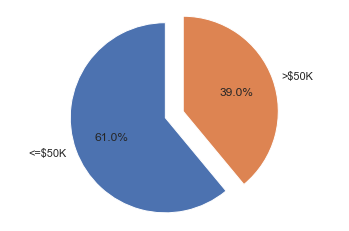

In [96]:
y = [len(bachelorBelow50k.index), len(bachelorAbove50k.index)]
mylabels = ["<=$50K", ">$50K"]
myexplode = [0.2, 0]

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=myexplode, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

Insight: berdasarkan pie chart di atas pendapatan sarjana yang <=<span>&#36;</span>50K ada sebesar 60.3% sedangkan ><span>&#36;</span>50K sebesar 39.7%. Pendapatan seseorang tidak hanya ditentukan berdasarkan seberapa banyak gelar yang didapatkan, tetapi ada faktor lain yang menyebabkan pendapatan seseorang ><span>&#36;</span>50K diantaranya pengalaman seseorang bekerja.

# Conditional Probabilities

fnlwgt merupakan representasi jumlah sebenarnya dari hasil sensus. Artinya, jika dalam sebuah row sebagai berikut: 

In [44]:
datacensus.head(1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1470,62,Local-gov,159908,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1258,38,United-States,<=50K


Artinya, jumlah orang yang berumur 62 tahun dengan pekerjaannya sebagai Adm-clerical dan tingkat pendidikan terakhirnya bachelors, ada sebanyak 159908 orang.

## P(Sales | HS-grad)

Untuk dapat menghitung conditional probability, maka kita perlu mengetahui jumlah orang yang sesungguhnya, yang diambil dari fitur fnlwgt. Contoh, untuk menghitung conditional probability seseorang adalah Sales jika diketahui tingkat edukasinya adalah HS-Grad, maka kita perlu menghitung jumlah seluruh orang yang merupakan Sales dan tingkatan HS-Grad, dibagi dengan seluruh orang yang berada di tingkatan HS-grad. 

In [45]:
p_occupation = datacensus[(datacensus['occupation'] == "Sales") & (datacensus['education'] == "HS-grad")]
sales_and_HS_grad_fnlwgt = datacensus[(datacensus['occupation'] == "Sales") & (datacensus['education'] == "HS-grad")]['fnlwgt'].sum()
sales_and_HS_grad_fnlwgt

187031900

In [46]:
p_education = datacensus[datacensus['education'] == "HS-grad"]
HS_grad_fnlwgt = datacensus[datacensus['education'] == "HS-grad"]['fnlwgt'].sum()
HS_grad_fnlwgt

1815182835

In [47]:
# P(Sales | HS-grad) = p(sales and HS-grad) / p(HS-grad)
p_sales_hs_grad = (sales_and_HS_grad_fnlwgt / HS_grad_fnlwgt) * 100
print("Peluang seseorang sebagai Sales jika diketahui tingkat pendidikan akhirnya HS-Grade adalah {:0.2f}%".format(p_sales_hs_grad))

Peluang seseorang sebagai Sales jika diketahui tingkat pendidikan akhirnya HS-Grade adalah 10.30%


## P(Federal Gov | Black)

In [48]:
p_federal_and_black = datacensus[(datacensus['workclass'] == "Federal-gov") & (datacensus['race'] == "Black")]
federal_and_black_fnlwgt = datacensus[(datacensus['workclass'] == "Federal-gov") & (datacensus['race'] == "Black")]['fnlwgt'].sum()
federal_and_black_fnlwgt

31248900

In [49]:
p_black = datacensus[datacensus['race'] == "Black"]
black_fnlwgt = datacensus[datacensus['race'] == "Black"]['fnlwgt'].sum()
black_fnlwgt

616838231

In [50]:
# P(Federal Gov | black) = p(federal gov and black) / p(black)
p_federal_black = (federal_and_black_fnlwgt / black_fnlwgt) * 100
print("Peluang seseorang Federal Goverment jika diketahui ras nya kulit hitam adalah {:0.2f}%".format(p_federal_black))

Peluang seseorang Federal Goverment jika diketahui ras nya kulit hitam adalah 5.07%


# Frequency Table

In [53]:
pd.crosstab(datacensus['occupation'], datacensus['education'])

education,10th,11th,12th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college
occupation,,,,,,,,,,,,,,
Adm-clerical,35,65,36,6,10,12,183,163,475,5,1301,60,9,1219
Armed-Forces,0,0,1,0,0,0,0,0,1,0,4,0,0,2
Craft-repair,165,165,56,41,106,95,104,236,212,2,1778,20,5,803
Exec-managerial,18,30,12,0,18,10,134,145,1204,42,739,422,42,802
Farming-fishing,39,35,16,35,62,27,13,47,67,1,349,6,3,154
Handlers-cleaners,65,113,38,37,42,44,23,25,46,0,592,5,0,256
Machine-op-inspct,97,99,32,52,91,74,31,59,58,1,976,7,1,293
Other-service,183,233,80,58,90,98,73,112,177,0,1213,17,3,746
Priv-house-serv,6,14,3,14,7,9,2,4,5,0,47,1,0,16
